Подключение библиотек и загрузка данных:

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression

df = pd.read_excel("data_hw_reg.xlsx")
df.head()

,date,country,confirmed,deaths
0,2020-01-22,Russia,0,0
1,2020-01-22,US,1,0
2,2020-01-23,Russia,0,0
3,2020-01-23,US,1,0
4,2020-01-24,Russia,0,0


Формирование выборки с учётом признака страны:

In [35]:
df['country'].unique()

array(['Russia', 'US'], dtype=object)

In [36]:
df_ru = df[df['country'] == "Russia"]
df_us = df[df['country'] == "US"]

Визуализация динамики заболеваемости и смертности по странам:

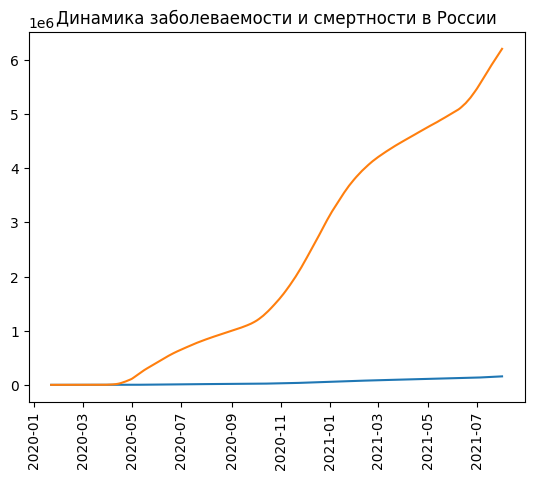

In [37]:
plt.title('Динамика заболеваемости и смертности в России')
plt.xticks(rotation=90)
plt.plot(df_ru['date'],df_ru['deaths'],df_ru['date'],df_ru['confirmed'])

#df_ru.set_index('date',inplace=True)
#fig, ax = plt.subplots(figsize=(15,10))
#df_ru.plot(y="confirmed", ax=ax, rot=90)
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

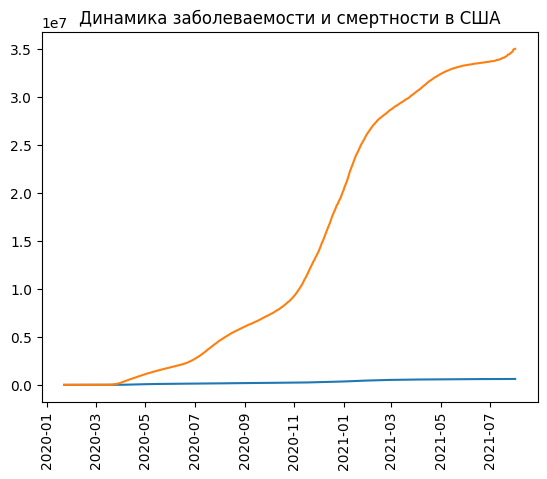

In [38]:
plt.title('Динамика заболеваемости и смертности в США')
plt.xticks(rotation=90)
plt.plot(df_us['date'],df_us['deaths'],df_us['date'],df_us['confirmed'])

Рассчет коэффициента корреляции заболеваемости и смертности:

In [39]:
df['confirmed'].corr(df['deaths'])

0.9898359549904744

Построение уравнения линейной регрессии с зависимостью смертности от заболеваемости:

In [64]:
X = df_ru[['confirmed']]
y = df_ru[['deaths']]

In [65]:
regressor = LinearRegression()
regressor.fit(X, y)

a = regressor.intercept_
b = regressor.coef_
a, b

(array([-5713.82792078]), array([[0.02352537]]))

Вычисление прогноза количества смертей в России для 25 000 000 случаев заражений:

In [67]:
confirmed_pred = 25000000
regressor.predict([[confirmed_pred]]) 

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[582420.3846451]])

**Выводы:**

1. Согласно коэфициенту корреляции (0.9898359549904744) между заболеваемостью и смертнотью наблюдается положительная корреляция (высокая степень связи между переменными).

2. По графикам можно сделать вывод, что смертность значительно меньше заболеваемости. В США показатели заболеваести выше чем в России, но показатели смертности ниже.

3. Расчитанные параметры уравнения регрессии показывают, что при увеличении заболеваемости на 1 смертность увеличивается в среднем на 0.02352537, связь между смертностью и заболеваемостью прямая (b > 0). Сдвиг линии относительно начала координат составляет -5713.82792078.

4. Для 25 000 000 заражений в России модель предсказала 582 420 смертей.